### Import the necessay libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
statemerge = pd.read_csv('statemerge.csv')

# 

In [205]:
allownedbus = statemerge.loc[(statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001')]

In [206]:
womenownedbus = statemerge.loc[(statemerge['SEX'] == '002') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001')]

In [207]:
womenownedbus = womenownedbus.join(allownedbus.set_index('NAME'), on = 'NAME', lsuffix='_left', rsuffix='_right')

In [208]:
womenownedbus['PERCENTAGE_WOMEN_OWNED'] = womenownedbus['FIRMPDEMP_2020_left']/womenownedbus['FIRMPDEMP_2020_right']

In [209]:
topwomenownedbus = womenownedbus.nlargest(n = 5, columns = 'PERCENTAGE_WOMEN_OWNED')

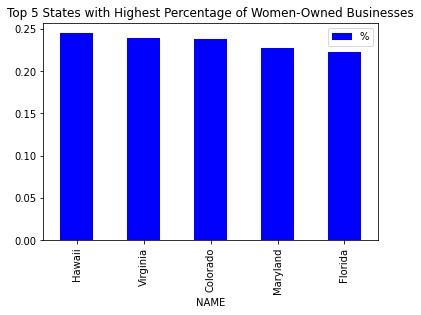

In [210]:
topwomenownedbus.plot(x = 'NAME', y = 'PERCENTAGE_WOMEN_OWNED', kind = 'bar', title = 'Top 5 States with Highest Percentage of Women-Owned Businesses', color = 'blue').legend(['%'])

In [211]:
botwomenownedbus = womenownedbus.nsmallest(n = 5, columns = 'PERCENTAGE_WOMEN_OWNED')

In [212]:
botwomenownedbus = botwomenownedbus.iloc[::-1]

In [213]:
botwomenownedbus

,NAME,SEX_left,ETH_GROUP_left,RACE_GROUP_left,VET_GROUP_left,FIRMPDEMP_2019_left,FIRMPDEMP_2020_left,SEX_right,ETH_GROUP_right,RACE_GROUP_right,VET_GROUP_right,FIRMPDEMP_2019_right,FIRMPDEMP_2020_right,PERCENTAGE_WOMEN_OWNED
968,New Hampshire,002,001,00,001,5274,4742,001,001,00,001,28969,29727,0.159518
7640,Iowa,002,001,00,001,9759,9466,001,001,00,001,60610,59463,0.159191
6879,Idaho,002,001,00,001,6635,6202,001,001,00,001,39080,41098,0.150908
1877,North Dakota,002,001,00,001,0,2849,001,001,00,001,19844,20010,0.142379
3142,South Dakota,002,001,00,001,3194,2958,001,001,00,001,21641,21798,0.135701


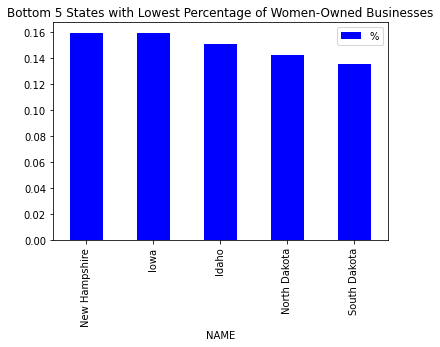

In [214]:
botwomenownedbus.plot(x = 'NAME', y = 'PERCENTAGE_WOMEN_OWNED', kind = 'bar', title = 'Bottom 5 States with Lowest Percentage of Women-Owned Businesses', color = 'blue').legend(['%'])

In [215]:
whiteownedbus = statemerge.loc[(statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '30') & (statemerge['VET_GROUP'] == '001')]

In [216]:
blackownedbus = statemerge.loc[(statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '40') & (statemerge['VET_GROUP'] == '001')]

In [217]:
nativeownedbus = statemerge.loc[(statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '50') & (statemerge['VET_GROUP'] == '001')]

In [218]:
hawaiianownedbus = statemerge.loc[(statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '70') & (statemerge['VET_GROUP'] == '001')]

In [223]:
whiteownedbus['FIRMPDEMP_2019'] = pd.to_numeric(whiteownedbus['FIRMPDEMP_2019'])
whiteownedbus['FIRMPDEMP_2020'] = pd.to_numeric(whiteownedbus['FIRMPDEMP_2020'])

In [224]:
blackownedbus['FIRMPDEMP_2019'] = pd.to_numeric(blackownedbus['FIRMPDEMP_2019'])
blackownedbus['FIRMPDEMP_2020'] = pd.to_numeric(blackownedbus['FIRMPDEMP_2020'])

In [225]:
nativeownedbus['FIRMPDEMP_2019'] = pd.to_numeric(nativeownedbus['FIRMPDEMP_2019'])
nativeownedbus['FIRMPDEMP_2020'] = pd.to_numeric(nativeownedbus['FIRMPDEMP_2020'])

In [226]:
hawaiianownedbus['FIRMPDEMP_2019'] = pd.to_numeric(hawaiianownedbus['FIRMPDEMP_2019'])
hawaiianownedbus['FIRMPDEMP_2020'] = pd.to_numeric(hawaiianownedbus['FIRMPDEMP_2020'])

In [235]:
whitetot2019 = whiteownedbus['FIRMPDEMP_2019'].sum()
whitetot2020 = whiteownedbus['FIRMPDEMP_2020'].sum()

In [237]:
blacktot2019 = blackownedbus['FIRMPDEMP_2019'].sum()
blacktot2020 = blackownedbus['FIRMPDEMP_2020'].sum()

In [238]:
nativetot2019 = nativeownedbus['FIRMPDEMP_2019'].sum()
nativetot2020 = nativeownedbus['FIRMPDEMP_2020'].sum()

In [239]:
hawaiiantot2019 = hawaiianownedbus['FIRMPDEMP_2019'].sum()
hawaiiantot2020 = hawaiianownedbus['FIRMPDEMP_2020'].sum()

In [240]:
raceownedbus = pd.DataFrame({'RACE':['WHITE', 'BLACK', 'NATIVE', 'HAWAIIAN'], '2019':[whitetot2019, blacktot2019, nativetot2019, hawaiiantot2019], '2020': [whitetot2020, blacktot2020, nativetot2020, hawaiiantot2020]})

In [260]:
raceownedbus['PERCENTAGE_DIFFERENCE'] = raceownedbus['2020']/raceownedbus['2019']

In [262]:
raceownedbus['PERCENTAGE_DIFFERENCE'] = (raceownedbus['PERCENTAGE_DIFFERENCE'] - 1.0) * 100

In [269]:
raceownedbus = raceownedbus.iloc[::-1]

In [271]:
raceownedbus

,RACE,2019,2020,PERCENTAGE_DIFFERENCE
3,HAWAIIAN,4797,3701,-22.847613
2,NATIVE,21629,23725,9.690693
1,BLACK,121715,132882,9.174711
0,WHITE,4857926,4905495,0.979204


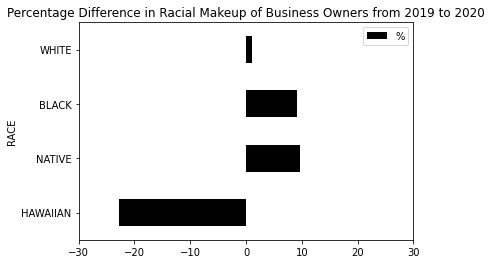

In [282]:
raceownedbus.plot(x = 'RACE', y = ['PERCENTAGE_DIFFERENCE'], kind = 'barh', title = 'Percentage Difference in Racial Makeup of Business Owners from 2019 to 2020', color = 'black', xticks = [-30, -20, -10, 0, 10, 20, 30], ylabel = 'Percentage Difference from 2019 to 2020').legend('%')

In [21]:
#filtering the data so i get data for minority women owned firms
onestatemerge = statemerge.loc[(statemerge['SEX'] == '002') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '90') & (statemerge['VET_GROUP'] == '001')]

In [22]:
#checking datatypes
result = onestatemerge.dtypes
print(result)

NAME              object
SEX               object
ETH_GROUP         object
RACE_GROUP        object
VET_GROUP         object
FIRMPDEMP_2019     int64
FIRMPDEMP_2020     int64
dtype: object


In [23]:
#changing state name data type so it can be plotted
onestatemerge['NAME'] = onestatemerge['NAME'].astype('|S')

In [24]:
#making sure state name data type changed
result = onestatemerge.dtypes

Text(0, 0.5, 'Number of firms')

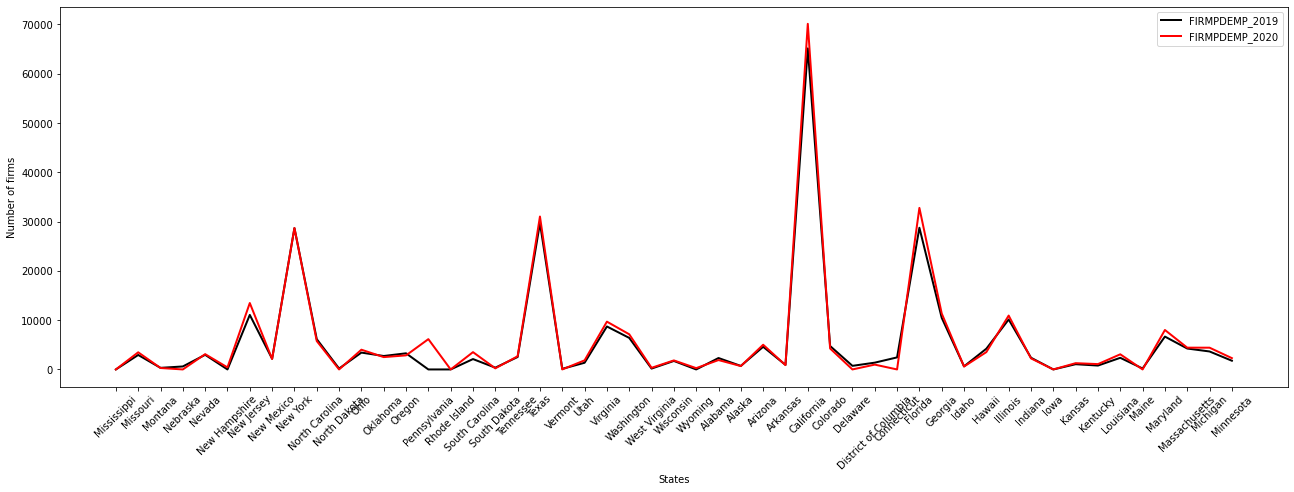

In [25]:
#plotting chart to find out how the number of businesses has changed from 2019 to 2020
plt.figure(figsize=(22, 8))
plt.plot( 'NAME', 'FIRMPDEMP_2019', data= onestatemerge, color='black', linewidth=2)
plt.plot( 'NAME', 'FIRMPDEMP_2020', data= onestatemerge, color='red', linewidth=2)
plt.legend()
plt.xlabel('States')
plt.xticks(rotation = 45)
spacing = 0.220
plt.subplots_adjust(bottom=spacing)
plt.ylabel('Number of firms')


In [26]:
womenstatemerge = onestatemerge = statemerge.loc[(statemerge['SEX'] == '002') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001')]

In [27]:
menstatemerge = onestatemerge = statemerge.loc[(statemerge['SEX'] == '003') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001')]

Text(0, 0.5, 'Number of firms')

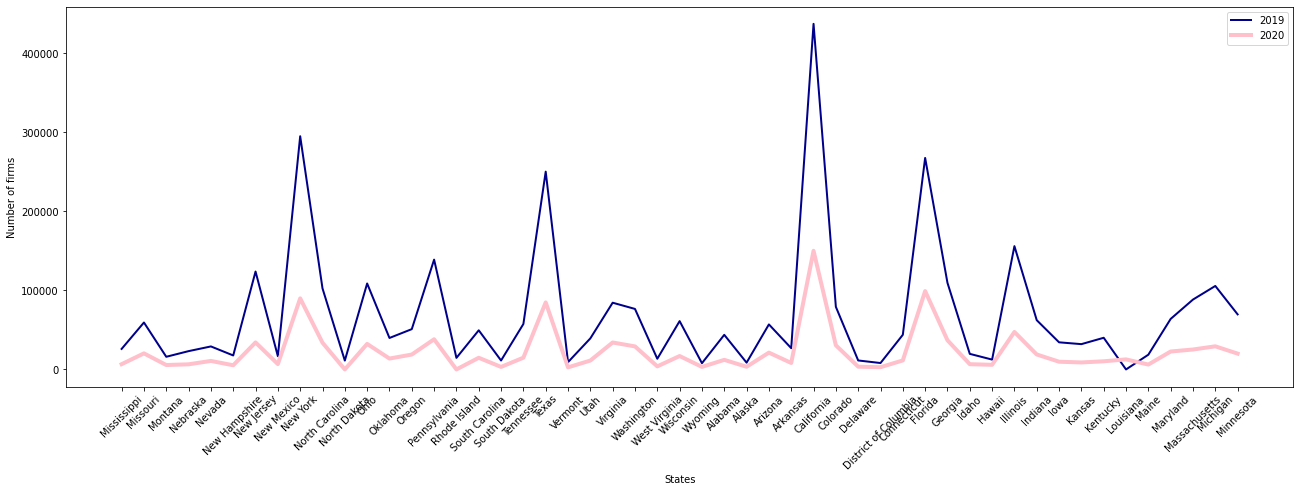

In [219]:
plt.figure(figsize=(22, 8))
plt.plot( 'NAME', 'FIRMPDEMP_2019', data= menstatemerge, color='darkblue', linewidth=2)
plt.plot( 'NAME', 'FIRMPDEMP_2019', data= womenstatemerge, color='pink', linewidth=4)
plt.legend(["2019", "2020"])
plt.xlabel('States')
plt.xticks(rotation = 45)
spacing = 0.220
plt.subplots_adjust(bottom=spacing)
plt.ylabel('Number of firms')


In [29]:
regions_to_states = {
    'South': ['West Virginia', 'District of Columbia', 'Maryland', 'Virginia',
              'Kentucky', 'Tennessee', 'North Carolina', 'Mississippi',
              'Arkansas', 'Louisiana', 'Alabama', 'Georgia', 'South Carolina',
              'Florida', 'Delaware'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'West': ['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana',
             'Wyoming', 'Utah', 'Colorado', 'Alaska', 'Hawaii'],
    'Midwest': ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota',
                'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana',
                'Ohio'],
    'Northeast': ['Maine', 'Vermont', 'New York', 'New Hampshire', 'Massachusetts',
                  'Rhode Island', 'Connecticut', 'New Jersey', 'Pennsylvania']
}

In [221]:
# nefilter = statemerge[(statemerge['RACE_GROUP'] == '30') | (statemerge['RACE_GROUP'] == '40') | (statemerge['RACE_GROUP'] == '50')
# | (statemerge['RACE_GROUP'] == '70') & ((statemerge['NAME'] == 'New York') | (statemerge['NAME'] == 'Maine') | (statemerge['NAME'] == 'Vermont')
# | (statemerge['NAME'] == 'New Hampshire') | (statemerge['NAME'] == 'Massachusetts') | (statemerge['NAME'] == 'Rhode Island') 
# | (statemerge['NAME'] == 'Connecticut') | (statemerge['NAME'] == 'New Jersey') | (statemerge['NAME'] == 'Pennsylvanua'))]
# print(nefilter)

In [30]:
nefilter = statemerge[((statemerge['RACE_GROUP'] == '30') | (statemerge['RACE_GROUP'] == '40') | (statemerge['RACE_GROUP'] == '50')
| (statemerge['RACE_GROUP'] == '70')) & (statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['VET_GROUP'] == '001') & (statemerge['NAME'].isin(regions_to_states['Northeast']))]

In [31]:
newhite2019 = nefilter.where(nefilter['RACE_GROUP'] == '30')['FIRMPDEMP_2019'].sum()
newhite2020 = nefilter.where(nefilter['RACE_GROUP'] == '30')['FIRMPDEMP_2020'].sum()

In [32]:
neblack2019 = nefilter.where(nefilter['RACE_GROUP'] == '40')['FIRMPDEMP_2019'].sum()
neblack2020 = nefilter.where(nefilter['RACE_GROUP'] == '40')['FIRMPDEMP_2020'].sum()

In [33]:
nenative2019 = nefilter.where(nefilter['RACE_GROUP'] == '50')['FIRMPDEMP_2019'].sum()
nenative2020 = nefilter.where(nefilter['RACE_GROUP'] == '50')['FIRMPDEMP_2020'].sum()

In [34]:
nehawaiian2019 = nefilter.where(nefilter['RACE_GROUP'] == '70')['FIRMPDEMP_2019'].sum()
nehawaiian2020 = nefilter.where(nefilter['RACE_GROUP'] == '70')['FIRMPDEMP_2020'].sum()

In [35]:
nebus = pd.DataFrame({'RACE':['WHITE', 'BLACK', 'NATIVE', 'HAWAIIAN'], '2019':[newhite2019, neblack2019, nenative2019, nehawaiian2019], '2020':[newhite2020, neblack2020, nenative2020, nehawaiian2020]})

<AxesSubplot:title={'center':'Top Business Owner Groups in the Northeast'}, xlabel='RACE', ylabel='Number of Businesses'>

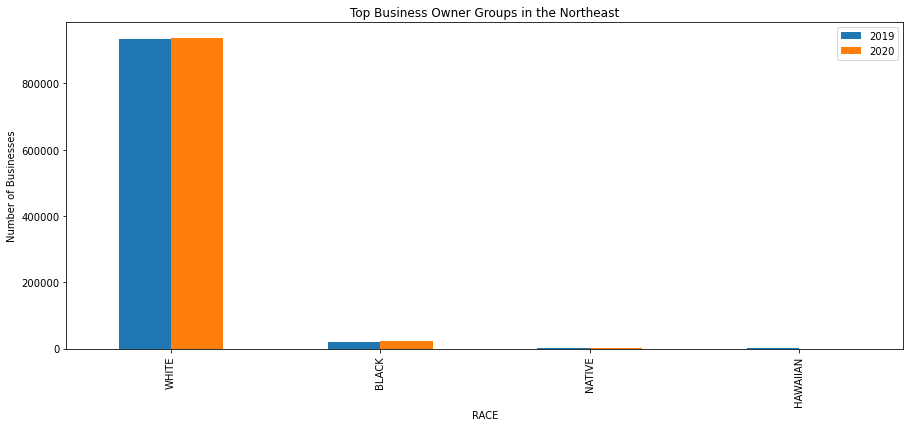

In [36]:
nebus.plot(x = 'RACE', y= ['2019', '2020'], ylabel = 'Number of Businesses', kind ='bar', title = 'Top Business Owner Groups in the Northeast', figsize=(15, 6))

In [37]:
wfilter = statemerge[((statemerge['RACE_GROUP'] == '30') | (statemerge['RACE_GROUP'] == '40') | (statemerge['RACE_GROUP'] == '50')
| (statemerge['RACE_GROUP'] == '70')) & (statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['VET_GROUP'] == '001') & (statemerge['NAME'].isin(regions_to_states['West']))]

In [38]:
wwhite2019 = wfilter.where(wfilter['RACE_GROUP'] == '30')['FIRMPDEMP_2019'].sum()
wwhite2020 = wfilter.where(wfilter['RACE_GROUP'] == '30')['FIRMPDEMP_2020'].sum()

In [39]:
wblack2019 = wfilter.where(wfilter['RACE_GROUP'] == '40')['FIRMPDEMP_2019'].sum()
wblack2020 = wfilter.where(wfilter['RACE_GROUP'] == '40')['FIRMPDEMP_2020'].sum()

In [40]:
wnative2019 = wfilter.where(wfilter['RACE_GROUP'] == '50')['FIRMPDEMP_2019'].sum()
wnative2020 = wfilter.where(wfilter['RACE_GROUP'] == '50')['FIRMPDEMP_2020'].sum()

In [41]:
whawaiian2019 = wfilter.where(wfilter['RACE_GROUP'] == '70')['FIRMPDEMP_2019'].sum()
whawaiian2020 = wfilter.where(wfilter['RACE_GROUP'] == '70')['FIRMPDEMP_2020'].sum()

In [42]:
wbus = pd.DataFrame({'RACE':['WHITE', 'BLACK', 'NATIVE', 'HAWAIIAN'], '2019':[wwhite2019, wblack2019, wnative2019, whawaiian2019], '2020':[wwhite2020, wblack2020, wnative2020, whawaiian2020]})

<AxesSubplot:title={'center':'Top Business Owner Groups in the West'}, xlabel='RACE', ylabel='Number of Businesses (in millions)'>

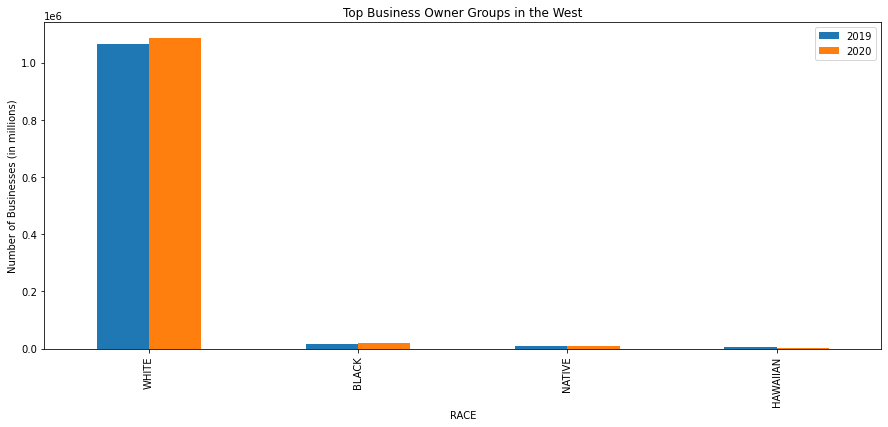

In [43]:
wbus.plot(x = 'RACE', y= ['2019', '2020'], ylabel = 'Number of Businesses (in millions)', kind ='bar', title = 'Top Business Owner Groups in the West', figsize=(15, 6))

In [44]:
sfilter = statemerge[((statemerge['RACE_GROUP'] == '30') | (statemerge['RACE_GROUP'] == '40') | (statemerge['RACE_GROUP'] == '50')
| (statemerge['RACE_GROUP'] == '70')) & (statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['VET_GROUP'] == '001') & (statemerge['NAME'].isin(regions_to_states['South']))]

In [45]:
swhite2019 = sfilter.where(sfilter['RACE_GROUP'] == '30')['FIRMPDEMP_2019'].sum()
swhite2020 = sfilter.where(sfilter['RACE_GROUP'] == '30')['FIRMPDEMP_2020'].sum()

In [46]:
sblack2019 = sfilter.where(sfilter['RACE_GROUP'] == '40')['FIRMPDEMP_2019'].sum()
sblack2020 = sfilter.where(sfilter['RACE_GROUP'] == '40')['FIRMPDEMP_2020'].sum()

In [47]:
snative2019 = sfilter.where(sfilter['RACE_GROUP'] == '50')['FIRMPDEMP_2019'].sum()
snative2020 = sfilter.where(sfilter['RACE_GROUP'] == '50')['FIRMPDEMP_2020'].sum()

In [48]:
shawaiian2019 = sfilter.where(sfilter['RACE_GROUP'] == '70')['FIRMPDEMP_2019'].sum()
shawaiian2020 = sfilter.where(sfilter['RACE_GROUP'] == '70')['FIRMPDEMP_2020'].sum()

In [49]:
sbus = pd.DataFrame({'RACE':['WHITE', 'BLACK', 'NATIVE', 'HAWAIIAN'], '2019':[swhite2019, sblack2019, snative2019, shawaiian2019], '2020':[swhite2020, sblack2020, snative2020, shawaiian2020]})

<AxesSubplot:title={'center':'Top Business Owner Groups in the South'}, xlabel='RACE', ylabel='Number of Businesses (in millions)'>

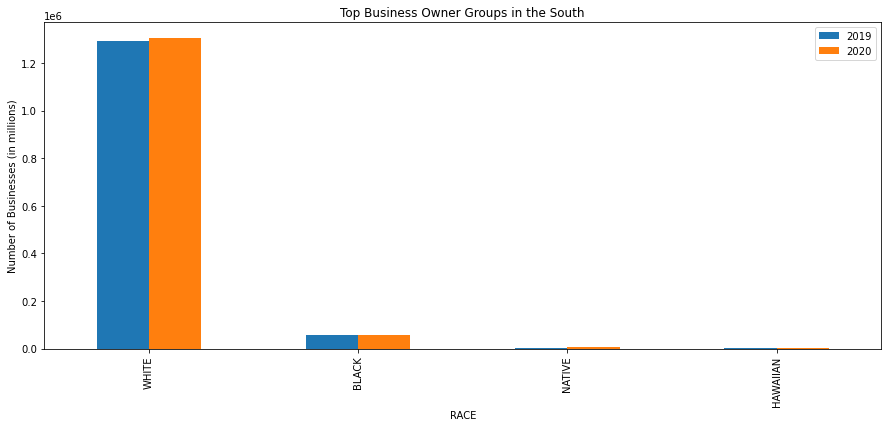

In [50]:
sbus.plot(x = 'RACE', y= ['2019', '2020'], ylabel = 'Number of Businesses (in millions)', kind ='bar', title = 'Top Business Owner Groups in the South', figsize=(15, 6))

In [51]:
mwfilter = statemerge[((statemerge['RACE_GROUP'] == '30') | (statemerge['RACE_GROUP'] == '40') | (statemerge['RACE_GROUP'] == '50')
| (statemerge['RACE_GROUP'] == '70')) & (statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['VET_GROUP'] == '001') & (statemerge['NAME'].isin(regions_to_states['Midwest']))]

In [52]:
mwwhite2019 = mwfilter.where(mwfilter['RACE_GROUP'] == '30')['FIRMPDEMP_2019'].sum()
mwwhite2020 = mwfilter.where(mwfilter['RACE_GROUP'] == '30')['FIRMPDEMP_2020'].sum()

In [53]:
mwblack2019 = mwfilter.where(mwfilter['RACE_GROUP'] == '40')['FIRMPDEMP_2019'].sum()
mwblack2020 = mwfilter.where(mwfilter['RACE_GROUP'] == '40')['FIRMPDEMP_2020'].sum()

In [54]:
mwnative2019 = mwfilter.where(mwfilter['RACE_GROUP'] == '50')['FIRMPDEMP_2019'].sum()
mwnative2020 = mwfilter.where(mwfilter['RACE_GROUP'] == '50')['FIRMPDEMP_2020'].sum()

In [55]:
mwhawaiian2019 = mwfilter.where(mwfilter['RACE_GROUP'] == '70')['FIRMPDEMP_2019'].sum()
mwhawaiian2020 = mwfilter.where(mwfilter['RACE_GROUP'] == '70')['FIRMPDEMP_2020'].sum()

In [56]:
mwbus = pd.DataFrame({'RACE':['WHITE', 'BLACK', 'NATIVE', 'HAWAIIAN'], '2019':[mwwhite2019, mwblack2019, mwnative2019, mwhawaiian2019], '2020':[mwwhite2020, mwblack2020, mwnative2020, mwhawaiian2020]})

<AxesSubplot:title={'center':'Top Business Owner Groups in the Midwest'}, xlabel='RACE', ylabel='Number of Businesses (in millions)'>

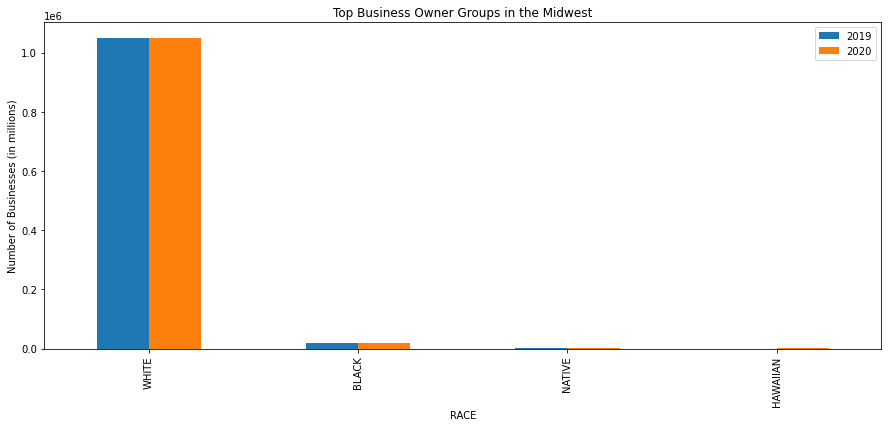

In [57]:
mwbus.plot(x = 'RACE', y= ['2019', '2020'], ylabel = 'Number of Businesses (in millions)', kind ='bar', title = 'Top Business Owner Groups in the Midwest', figsize=(15, 6))

In [9]:
statemerge.loc[statemerge["SEX"] == "001", "SEX"] = 'Total'
statemerge.loc[statemerge["SEX"] == "002", "SEX"] = 'Female'
statemerge.loc[statemerge["SEX"] == "003", "SEX"] = 'Male'
statemerge.loc[statemerge["SEX"] == "004", "SEX"] = 'Non-Binary'

In [199]:
bfilter = statemerge[(statemerge['RACE_GROUP'] == '90') & (statemerge['VET_GROUP'] == '001') & (statemerge['ETH_GROUP']== '001')]

In [202]:
black = bfilter.groupby("SEX").sum("FIRMPDEMP_2019")

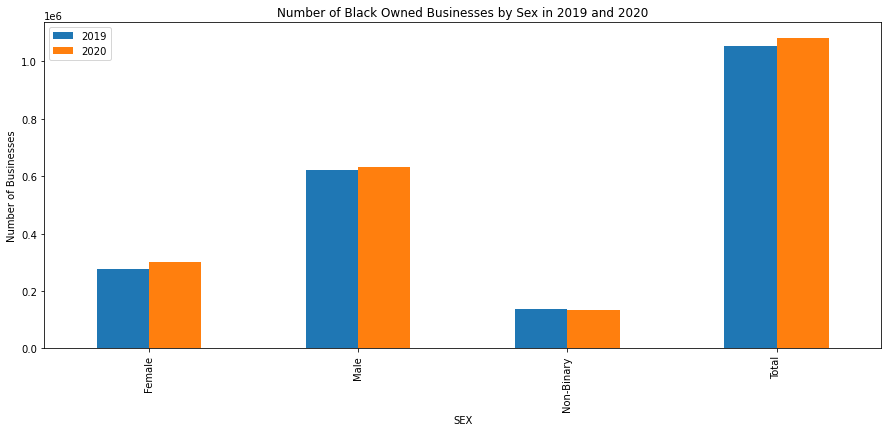

In [203]:
ax = black.plot(title = 'Number of Black Owned Businesses by Sex in 2019 and 2020', ylabel = 'Number of Businesses', y= ['FIRMPDEMP_2019', 'FIRMPDEMP_2020'], kind ='bar', use_index =True, figsize=(15, 6))
ax.legend(["2019", "2020"])

In [194]:
bfilter = statemerge[(statemerge['SEX'] == 'Total') & (statemerge['RACE_GROUP'] == '90') & (statemerge['VET_GROUP'] == '001') & (statemerge['ETH_GROUP']== '001')]

In [195]:
bbusinesslost = bfilter.groupby('NAME').sum('CHANGE').nsmallest(7, 'CHANGE')

Text(0.5, 1.0, 'States That Lost the Most Black Owned Businesses Between 2019 & 2020')

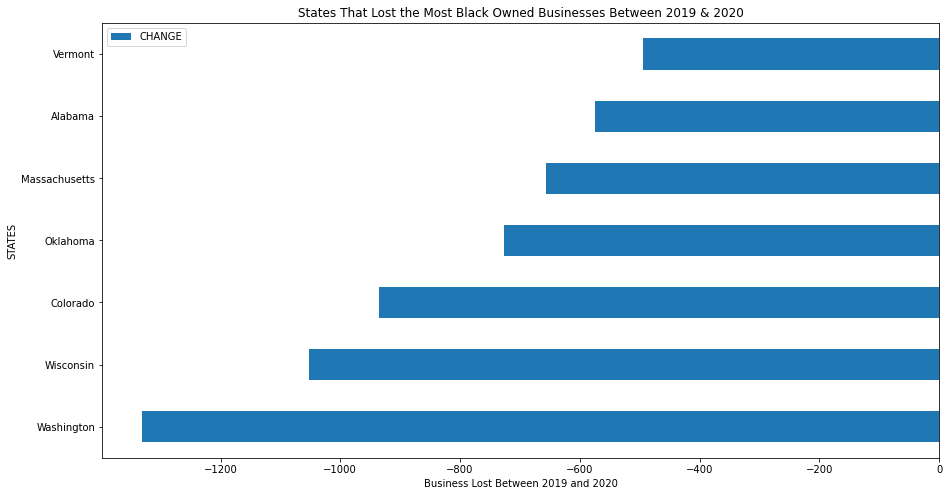

In [204]:
fig, ax = plt.subplots()
bbusinesslost.plot(kind='barh', ax=ax, y= 'CHANGE', figsize = (15,8))
ax.set_ylabel('STATES')
ax.set_xlabel('Business Lost Between 2019 and 2020')
ax.set_title('States That Lost the Most Black Owned Businesses Between 2019 & 2020')
#ax = df.plot(kind='bar') # "same" as above

In [205]:
bbusinessgained = bfilter.groupby('NAME').sum('CHANGE').nlargest(7, 'CHANGE')

Text(0.5, 1.0, 'States That Gained the Most Black Owned Businesses Between 2019 & 2020')

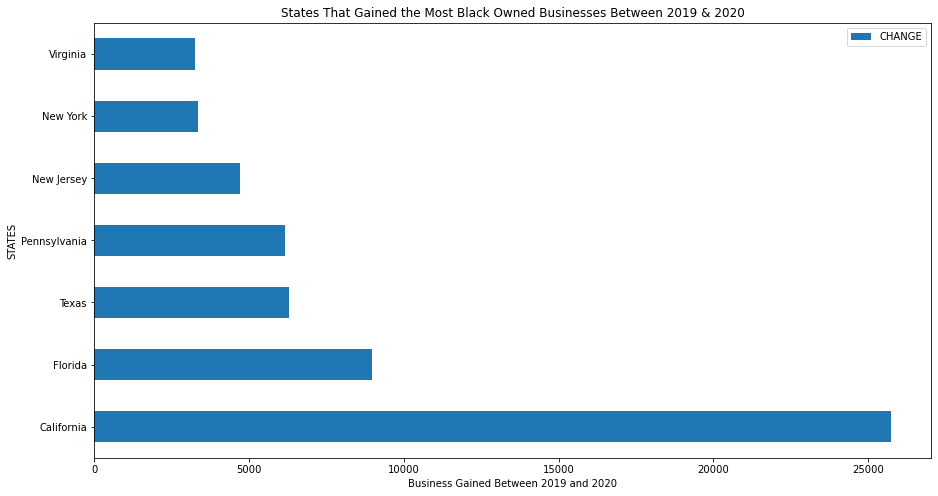

In [206]:
fig, ax = plt.subplots()
bbusinessgained.plot(kind='barh', ax=ax, y= 'CHANGE', figsize = (15,8))
ax.set_ylabel('STATES')
ax.set_xlabel('Business Gained Between 2019 and 2020')
ax.set_title('States That Gained the Most Black Owned Businesses Between 2019 & 2020')
#ax = df.plot(kind='bar') # "same" as above

In [207]:
sexfilter = statemerge[(statemerge['SEX'] != 'Non-Binary') & (statemerge['SEX'] != 'Total') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001') & (statemerge['ETH_GROUP']== '001')]

In [208]:
sexfilter

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP_2019,FIRMPDEMP_2020,CHANGE
4,Mississippi,Female,001,00,001,6659,7751,1092
5,Mississippi,Male,001,00,001,25943,24533,-1410
290,Missouri,Female,001,00,001,20311,23913,3602
306,Missouri,Male,001,00,001,59319,58367,-952
390,Montana,Female,001,00,001,5584,6079,495
...,...,...,...,...,...,...,...,...
8230,Iowa,Male,001,00,001,34277,33644,-633
8379,Maryland,Female,001,00,001,22668,23583,915
8529,Maryland,Male,001,00,001,63860,62230,-1630
8842,Texas,Female,001,00,001,84697,94432,9735


In [209]:
mf = sexfilter.groupby('SEX').sum('FIRMPDEMP_2019')

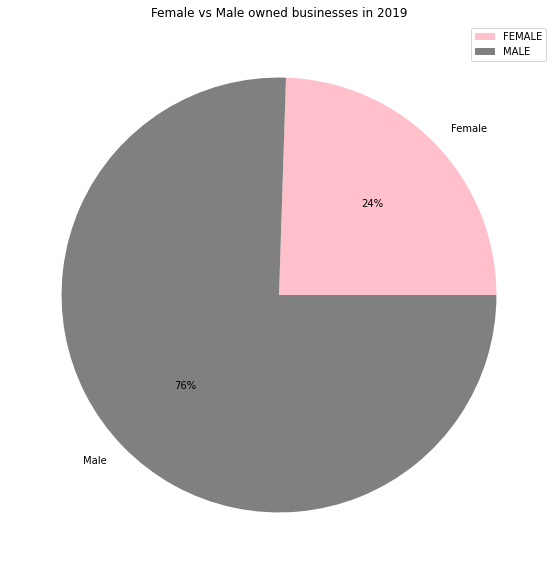

In [210]:
mf.plot.pie(title = 'Female vs Male owned businesses in 2019',y='FIRMPDEMP_2019', autopct='%1.0f%%', colors = ['pink', 'grey'], ylabel = '',figsize=(10,10)).legend(['FEMALE', 'MALE'])

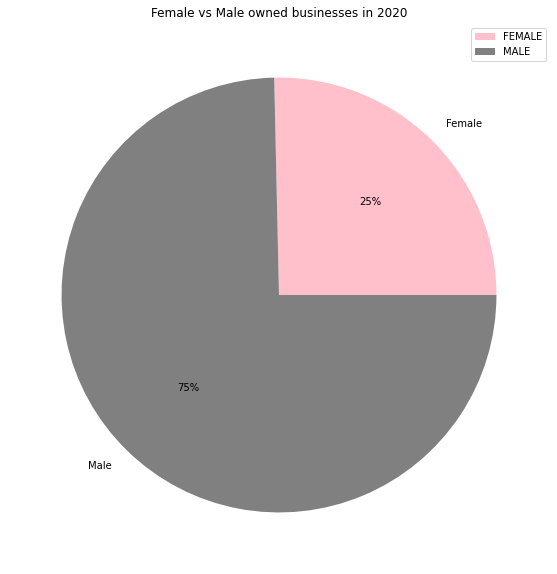

In [211]:
mf.plot.pie(title = 'Female vs Male owned businesses in 2020',y='FIRMPDEMP_2020', autopct='%1.0f%%', colors = ['pink', 'grey'], ylabel = '',figsize=(10,10)).legend(['FEMALE', 'MALE'])